
# Project: Investigate a Dataset (The Movie Database (TMDb))

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this analysis, I have selected The Movie Database (TMDb) for investigation. The movie dataset is accessible from Kaggle which contains several movie features including user ratings and revenue.

**Features:**
     id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj

**Questions**:
<ul>
<li><a href="#rev_pop">How does Revenue, Popularity are associated with successful movies?</a></li>
<li><a href="#vote">Does vote average affects higher popularity and revenue?</a></li>
<li><a href="#budget">Does budget related to popularity and revenue?</a></li>
<li><a href="#time">Does runtime associated with popularity and revenue?</a></li>
<li><a href="#genre">How does most popular genre affects successful movies?</a></li>
<li><a href="#direct">Top 20 popular Director movies have higher revenue?</a></li>
<li><a href="#prod_comp">Top 20 popular production company movies have higher profit?</a></li>
<li><a href="#over_year">Does popularity and revenue increased over years?</a></li>    
</ul>

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic word to visualize plots in the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> The Data Wrangling process contains below steps 
> - Data Acquisition
> - Data Assessing
> - Data Cleaning

### Data Acquisition

> Download the Movie Dataset [tmdb-movies.csv](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv)


In [2]:
# Read data from csv file and Load it into dataframe and print first n rows
csv_download_url = ("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")
df_tmdb_movies = pd.read_csv(csv_download_url)
df_tmdb_movies.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


**Observation :**
- As mentioned in the overview Certain columns, like ‘cast’, ‘genres’, 'directors', 'production_companies' contains multiple values separated by pipe (|) characters.
- "budget_adj", "revenue_adj" shows the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time  

### Data Assessing

In [3]:
# Check the number of samples and columns
print('Number of samples: {} \nNumber of columns: {}'.format(df_tmdb_movies.shape[0], df_tmdb_movies.shape[1]))

Number of samples: 10866 
Number of columns: 21


In [4]:
# Check the data types in the DataFrame
df_tmdb_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

**Observation :**
- Column names are in Lowercase format which would be more accessible throughout analysis
- release_date has object as data type which should be changed to Datetime format

In [5]:
# Brief summary of DataFrame to check missing or possibly errant data
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Observation :**
- From the above information, Dataset has lot of null values. Columns like *homepage*, *tagline*, *keywords* and *overview* which might not be needed for further analysis.

In [6]:
# Check for duplicate instances
df_tmdb_movies.duplicated().value_counts()

False    10865
True         1
dtype: int64

**Observation :**
- Only one row is duplicated

In [7]:
# Concise summary statistics of numerical columns in DataFrame
df_tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


**Observation :**
- Features *budget*, *revenue*, *budget_adj* and *revenue_adj* are having zero values for *min* and quantiles *25%*,*50%* 
- *budget_adj* and *revenue_adj* which might not be needed for further analysis

In [8]:
# Check for missing values in Dataset
df_tmdb_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Observation :**
- Columns which are not necessary for analysis are having more null values which can be dropped

In [9]:
# Check the columns of a DataFrame are zero or not
df_tmdb_movies.all()

id                       True
imdb_id                  True
popularity               True
budget                  False
revenue                 False
original_title           True
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date             True
vote_count               True
vote_average             True
release_year             True
budget_adj              False
revenue_adj             False
dtype: bool

**Observation :**
- Features *budget*, *revenue*, *runtime*, *budget_adj*, *revenue_adj* are having zero values

In [10]:
# Count zeros in columns
(df_tmdb_movies == 0).sum(axis=0)

id                         0
imdb_id                    0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

**Observation :**
- *budget*, *revenue* and *adj's* are having huge number of zeros. Let's investigate further to decide whether to keep the zero values or not

In [11]:
# Check the skewness of the columns which has '0'
df_tmdb_movies[['budget','revenue','runtime','budget_adj','revenue_adj']].skew()

budget         3.717237
revenue        6.658397
runtime        6.103793
budget_adj     3.114920
revenue_adj    6.251202
dtype: float64

**Observation :**
- Skewness of these features are highly positive. Let's use imputation techniques to deal with missing data in cleaning

In [12]:
# Check number of unique elements in the DataFrame
df_tmdb_movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

**Observation :**
- Features have huge number of unique values. So, its better to categorize the data

### Data Cleaning
- Change datatype of 'release_date' from string to DateTime
- Remove duplicates from the Dataset
- Drop unused columns from dataframe
- Replace zero values with imputation techniques and reduce skewness
- Drop null values from the DataFrame

**Issue1 :**
 Change datatype of 'release_date' from string to DateTime

In [13]:
#Change datatype from string to datetime format
df_tmdb_movies['release_date'] = pd.to_datetime(df_tmdb_movies['release_date'])

**Verify :**

In [14]:
# Verify data type is changed to datetime
print(type(df_tmdb_movies.release_date[0]))
df_tmdb_movies['release_date'].head(2)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]

**Issue2 :**
 Remove duplicates from the Dataset

In [15]:
# Drop duplicates from the dataframe
df_tmdb_movies.drop_duplicates(keep=False, inplace = True)

**Verify :**

In [16]:
# Verify duplicates are dropped
sum(df_tmdb_movies.duplicated()) #should return 0

0

In [17]:
# Verify the dataframe shape
df_tmdb_movies.shape

(10864, 21)

**Issue3 :**
 Drop unused columns from dataframe

In [18]:
# Check columns before drop
print(df_tmdb_movies.shape)
df_tmdb_movies.columns

(10864, 21)


Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [19]:
# Drop the unused columns
df_tmdb_movies.drop(['imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'budget_adj','revenue_adj',],axis =1,inplace = True)

**Verify :**

In [20]:
# Verify columns are dropped - Check shape, no of columns and column names
print(df_tmdb_movies.shape)
df_tmdb_movies.columns

(10864, 12)


Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year'],
      dtype='object')

**Issue4 :**
 Replace zero values with imputation techniques and reduce skewness

In [21]:
# Copy of DataFrame
df_impute_data = df_tmdb_movies.copy()

# Check the statistics before imputation
df_impute_data.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year
count,10864.000000,10864.000000,1.086400e+04,1.086400e+04,10864.000000,10864.000000,10864.000000
mean,66068.571797,0.646450,1.462287e+07,3.983047e+07,102.072717,5.975101,2001.321060
std,92138.047887,1.000277,3.091536e+07,1.170131e+08,31.383996,0.935134,12.813579
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,10595.250000,0.207566,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,20659.000000,0.383829,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,75614.500000,0.713925,1.500000e+07,2.400183e+07,111.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


In [22]:
# Replace zeros with mean values
cols = ['budget', 'revenue', 'runtime']
df_impute_data[cols] = df_impute_data[cols].replace(0,df_impute_data[cols].mean())

**Verify :**

In [23]:
# Check the statistics after imputation
df_impute_data.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year
count,10864.000000,10864.000000,1.086400e+04,1.086400e+04,10864.000000,10864.000000,10864.000000
mean,66068.571797,0.646450,2.228965e+07,6.188682e+07,102.363978,5.975101,2001.321060
std,92138.047887,1.000277,2.801524e+07,1.110267e+08,30.905305,0.935134,12.813579
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,1.500000,1960.000000
25%,10595.250000,0.207566,1.462287e+07,3.983047e+07,90.000000,5.400000,1995.000000
50%,20659.000000,0.383829,1.462287e+07,3.983047e+07,99.000000,6.000000,2006.000000
75%,75614.500000,0.713925,1.500000e+07,3.983047e+07,111.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


> - Zero values are replaced with mean

In [24]:
# Check the skewness of the columns after interpolation
df_impute_data[['budget', 'revenue', 'runtime']].skew()

budget     4.228434
revenue    7.215495
runtime    6.465799
dtype: float64

**Observation :**
- Even after using interpolation technique, skewness is still positively high as dataset has large number of outliers which will lead to skewed analysis and inappropriate results. Its better to eradicate the inappropriate values to optimize the data and anlaysis

In [25]:
# Replace zeros with NAN in original Dataframe to drop the inappropriate values
cols = ['budget', 'revenue', 'runtime']
df_tmdb_movies[cols] = df_tmdb_movies[cols].replace(0,np.NAN)

**Issue5 :**
 Drop null values from the DataFrame

In [26]:
# Check null values before drop
df_tmdb_movies.isna().sum()

id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
director                  44
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_average               0
release_year               0
dtype: int64

In [27]:
# Drop all null values from DataFrame
df_tmdb_movies.dropna(how='any',inplace=True)

**Verify :**

In [28]:
# Check whether null values are dropped
df_tmdb_movies.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
dtype: int64

In [29]:
# Check summary after dropping null values
df_tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_average,release_year
count,3806.00000,3806.000000,3.806000e+03,3.806000e+03,3806.000000,3806.000000,3806.000000
mean,40030.54020,1.203379,3.759102e+07,1.089445e+08,109.355491,6.170547,2001.228586
std,67578.02741,1.480547,4.232416e+07,1.772832e+08,19.846375,0.792300,11.327628
min,5.00000,0.010335,1.000000e+00,2.000000e+00,15.000000,2.200000,1960.000000
25%,5932.50000,0.470344,1.000000e+07,1.429262e+07,96.000000,5.700000,1995.000000
50%,11255.00000,0.810226,2.500000e+07,4.620904e+07,106.000000,6.200000,2004.000000
75%,38573.25000,1.387058,5.000000e+07,1.260625e+08,119.000000,6.700000,2010.000000
max,417859.00000,32.985763,4.250000e+08,2.781506e+09,338.000000,8.400000,2015.000000


In [30]:
# Check the skewness of the columns after dropping null and zero values
df_tmdb_movies[['budget', 'revenue', 'runtime']].skew()

budget     2.370042
revenue    4.254784
runtime    1.649015
dtype: float64

**Observation :**
- Comparitively skewness reduced considerably better    

In [31]:
# Check the final dataset's number of samples and columns
print('Number of samples: {} \nNumber of columns: {}'.format(df_tmdb_movies.shape[0],df_tmdb_movies.shape[1]))

Number of samples: 3806 
Number of columns: 12


**Save cleaned Dataset :**

In [32]:
#creating the new csv with wrangled data
df_tmdb_movies.to_csv('tmdb-movies-updated.csv', index=False) # set index=False to avoid unnamed index column in new dataset

<a id='eda'></a>
## Exploratory Data Analysis




In [33]:
# Read data from csv file and Load it into dataframe and print first n rows
tmdb_movies = pd.read_csv('tmdb-movies-updated.csv')
tmdb_movies.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_average,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015


**Explore the relationship between features**

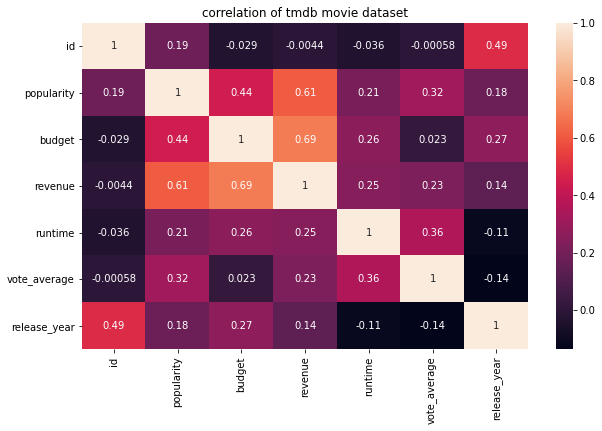

In [34]:
# Correlation of movie dataframe
movie_corr = tmdb_movies.corr()

# Set figure size
plt.figure(figsize=(10,6))

# Plot correlation using heapmap
sns.heatmap(tmdb_movies.corr(), annot=True)
plt.title('correlation of tmdb movie dataset');

**Observation :**
- *popularity*, *revenue* numeric features are having fairly positive relationship which might be the key features of success movies.
- **Note :** Even though correlation relationship exists between features, it's still doesn't mean channge in one would affect other, **correlation does not imply causation**

**Distribution of movie key features**

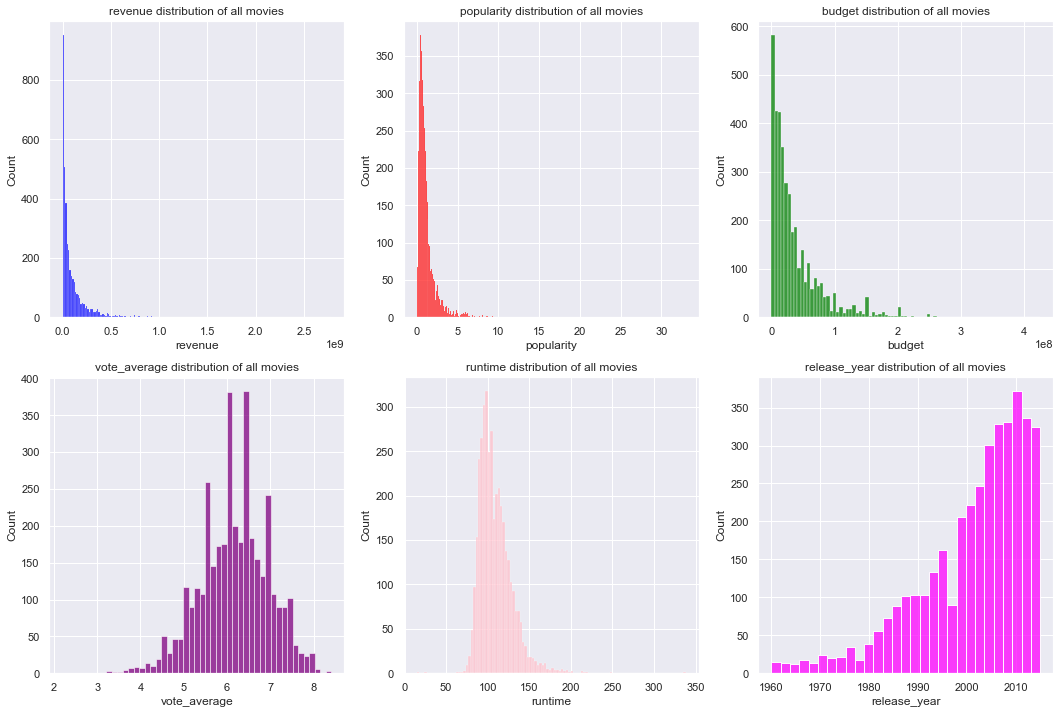

In [35]:
# set background theme as darkgrid
sns.set_theme(style="darkgrid")

# set the figure size
plt.figure(figsize=(18,12))

# Plot the distribution of key features
# Revenue
plt.subplot(2,3,1)
sns.histplot(tmdb_movies.revenue, color = 'blue')
plt.title('revenue distribution of all movies')
# Popularity
plt.subplot(2,3,2)
sns.histplot(tmdb_movies.popularity, color = 'red')
plt.title('popularity distribution of all movies')
# Budget
plt.subplot(2,3,3)
sns.histplot(tmdb_movies.budget, color = 'green')
plt.title('budget distribution of all movies')
# vote_average
plt.subplot(2,3,4)
sns.histplot(tmdb_movies.vote_average, color = 'purple')
plt.title('vote_average distribution of all movies');
# runtime
plt.subplot(2,3,5)
sns.histplot(tmdb_movies.runtime, color = 'pink')
plt.title('runtime distribution of all movies');
# release_year
plt.subplot(2,3,6)
sns.histplot(tmdb_movies.release_year, color = 'magenta')
plt.title('release_year distribution of all movies');

**Calculate profit for each movie in the DataFrame**

In [36]:
# Add profit column to movie dataset
tmdb_movies['profit'] = tmdb_movies['revenue'] - tmdb_movies['budget']
tmdb_movies.head(2)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,2.284364e+08


**Funcion to categorize the feature column levels to discrete intervals to simplify the analysis** 

In [37]:
def catergorize_feature(feature_name):
    # Bin edges to "cut" the data into groups from describe quartile, max and min values
    bin_edges = tmdb_movies[feature_name].describe()[['min', '25%', '50%', '75%', 'max']].values
    
    # Add suffix _category to each category column
    category_name = '{}_category'.format(feature_name)
    
    # Add labels for bin edges
    label_list = ['low', 'med', 'mod_high', 'high']
    
    # Use cut method to categorize the feature and add the categorized data to data frame
    tmdb_movies[category_name] = pd.cut(x = tmdb_movies[feature_name], bins=bin_edges, labels = label_list)

**Function to calculate proportion of feature's counts and totals**

In [38]:
def calculate_proportion(counts, totals):
    prop = []
    
    # Dividing feature into four categories *low*, *medium*, *moderately high* and *high*
    categories = ['low', 'med', 'mod_high', 'high']
    
    # Create dataframe to store the proportions
    df_prop = pd.DataFrame(columns = categories)
    
    for cat in range(0,len(categories)):
        # Proprtion = Counts/Totals
        df_prop[categories[cat]] = counts[categories[cat]]/totals[categories[cat]]
        # Add proportion to prop dataframe and add suffix *_prop* to category names to differentiate feature and category
        df_prop.rename(columns={df_prop.columns[cat]:'{}_prop'.format(categories[cat])}, inplace=True)
    return df_prop

<a id='rev_pop'></a>
### Research Question 1: How does Revenue, Popularity are associated with successful movies?

In [39]:
# call catergorize_feature to categorize the Revenue and add revenue_category to Dataframe
catergorize_feature('revenue')

# call catergorize_feature to categorize the Popularity and add popularity_category to Dataframe
catergorize_feature('popularity')

# Check whether columns are created
tmdb_movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'profit', 'revenue_category',
       'popularity_category'],
      dtype='object')

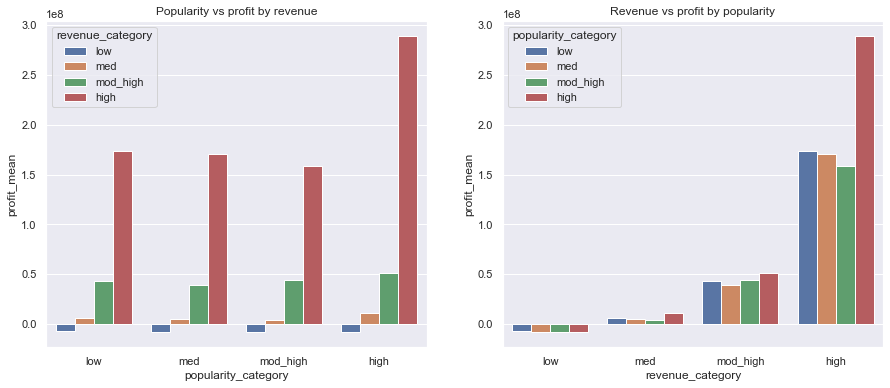

In [40]:
# Group the revenue and popularity categories and find profit mean
avgprofit_pop_rev = tmdb_movies.groupby(['revenue_category', 'popularity_category']).agg(profit_mean=('profit', 'mean')).reset_index()
avgprofit_rev_pop = tmdb_movies.groupby(['revenue_category', 'popularity_category']).agg(profit_mean=('profit', 'mean')).reset_index()

# Set figure size
plt.subplots(figsize=(15, 6))

# Plot the results using barplot
plt.subplot(1,2,1)
sns.barplot(x='popularity_category', y='profit_mean', hue='revenue_category', data=avgprofit_pop_rev);
plt.title('Popularity vs profit by revenue')

plt.subplot(1,2,2)
sns.barplot(x='revenue_category', y='profit_mean', hue='popularity_category', data=avgprofit_rev_pop);
plt.title('Revenue vs profit by popularity');

> - Revenue, Popularity are having highly positive relationship by profit. Higher revenue levels has higher popularity and profit mean and Vice versa. So, Revenue, popularity are most important key features of success movies.

<a id='vote'></a>
### Research Question 2: Does vote average affects higher popularity and revenue?

In [41]:
# call catergorize_feature to categorize the vote average values
catergorize_feature('vote_average')

# Check whether columns are created
tmdb_movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'profit', 'revenue_category',
       'popularity_category', 'vote_average_category'],
      dtype='object')

In [42]:
# count for each vote average and revenue_category by popularity
vote_counts = tmdb_movies.groupby(['vote_average_category', 'revenue_category']).count()['popularity']

# Total counts for each vote average category by popularity
vote_totals = tmdb_movies.groupby('vote_average_category').count()['popularity']

# Proportion of Vote average and Revenue_category by Popularity
vote_prop = calculate_proportion(vote_counts, vote_totals)
vote_prop

,low_prop,med_prop,mod_high_prop,high_prop
revenue_category,,,,
low,0.325346,0.224731,0.242492,0.189675
med,0.279263,0.256989,0.242492,0.214366
mod_high,0.237788,0.250538,0.253615,0.260382
high,0.157604,0.267742,0.260289,0.334456


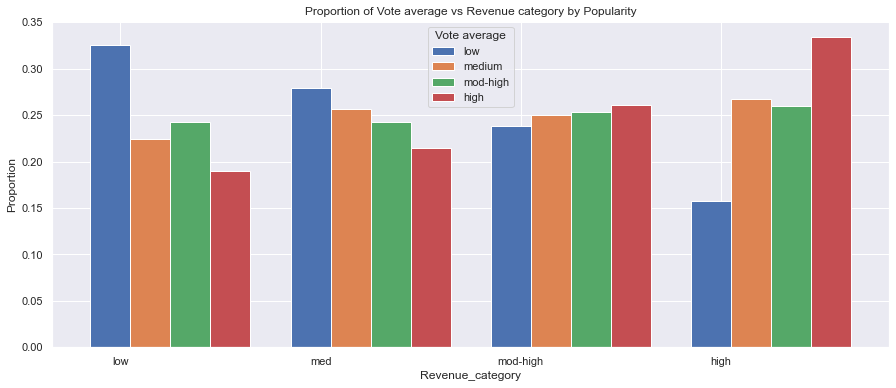

In [43]:
# set location and labels
ind = np.arange(len(vote_prop['low_prop']))
width=0.2
locations=ind+width/4
labels = ['low', 'med', 'mod-high', 'high']

# Set figure size
plt.subplots(figsize=(15, 6))

#Plot the proportion results
low_bars = plt.bar(ind, vote_prop['low_prop'], width, label='low')
med_bars = plt.bar(ind+width, vote_prop['med_prop'], width, label='medium')
mhigh_bars = plt.bar(ind+width*2, vote_prop['mod_high_prop'], width, label='mod-high')
high_bars = plt.bar(ind+width*3, vote_prop['high_prop'], width, label='high')

# Set plot properties
plt.xlabel('Revenue_category')
plt.ylabel('Proportion')
plt.title('Proportion of Vote average vs Revenue category by Popularity')
plt.xticks(locations,labels)
plt.legend(title = 'Vote average');

> Vote average not completely associated with revenue and popularity as low vote_average movies having high revenue by popularity and vice versa.

<a id='budget'></a>
### Research Question 3: Does budget related to popularity and revenue?

In [44]:
# call catergorize_feature to categorize the Budget values
catergorize_feature('budget')

# Check whether columns are created
tmdb_movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'profit', 'revenue_category',
       'popularity_category', 'vote_average_category', 'budget_category'],
      dtype='object')

In [45]:
# count for each budget and popularity_category by revenue
bud_counts = tmdb_movies.groupby(['budget_category', 'popularity_category']).count()['revenue']

# Total counts for budget category by revenue
bud_totals = tmdb_movies.groupby('budget_category').count()['revenue']

# Proportion of budget and popularity_category by revenue
bud_prop = calculate_proportion(bud_counts, bud_totals)
bud_prop

,low_prop,med_prop,mod_high_prop,high_prop
popularity_category,,,,
low,0.451741,0.287893,0.163551,0.060403
med,0.283582,0.288847,0.267523,0.148770
mod_high,0.168159,0.254528,0.316589,0.272931
high,0.096517,0.168732,0.251168,0.517897


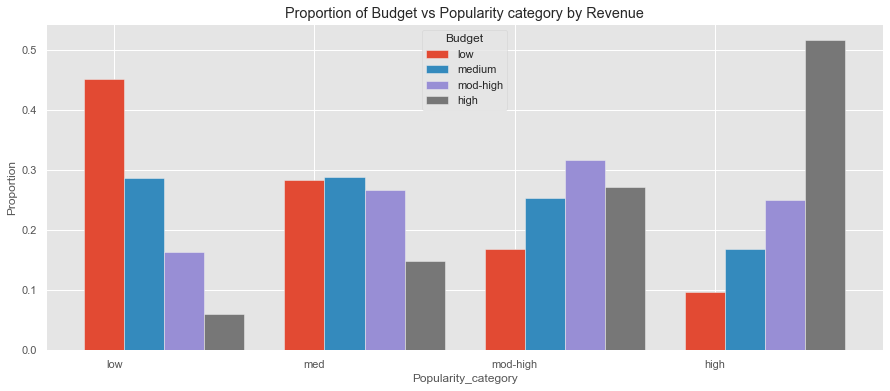

In [46]:
# Set plot style
plt.style.use('ggplot')

# set location and labels
ind = np.arange(len(bud_prop['low_prop']))
width=0.2
locations=ind+width/4
labels = ['low', 'med', 'mod-high', 'high']

# Set figure size
plt.subplots(figsize=(15, 6))

#Plot the proportion results
low_bars = plt.bar(ind, bud_prop['low_prop'], width, label='low')
med_bars = plt.bar(ind+width, bud_prop['med_prop'], width, label='medium')
mhigh_bars = plt.bar(ind+width*2, bud_prop['mod_high_prop'], width, label='mod-high')
high_bars = plt.bar(ind+width*3, bud_prop['high_prop'], width, label='high')

# Set plot properties
plt.xlabel('Popularity_category')
plt.ylabel('Proportion')
plt.title('Proportion of Budget vs Popularity category by Revenue')
plt.xticks(locations,labels)
plt.legend(title = 'Budget');

> - Budget have modest association with popularity and revenue.

<a id='time'></a>
### Research Question 4: Does runtime associated with popularity and revenue?

In [47]:
# call catergorize_feature to categorize the runtime values
catergorize_feature('runtime')

# Check whether columns are created
tmdb_movies.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_average', 'release_year', 'profit', 'revenue_category',
       'popularity_category', 'vote_average_category', 'budget_category',
       'runtime_category'],
      dtype='object')

In [48]:
# count for each runtime category and revenue_category by popularity
time_counts = tmdb_movies.groupby(['runtime_category','revenue_category']).count()['popularity']

# Total counts for each runtime category by popularity
time_totals = tmdb_movies.groupby('runtime_category').count()['popularity']

# Proportion of runtime and Revenue_category by Popularity
time_prop = calculate_proportion(time_counts, time_totals)
time_prop

,low_prop,med_prop,mod_high_prop,high_prop
revenue_category,,,,
low,0.342054,0.287368,0.211538,0.144835
med,0.261628,0.276842,0.262443,0.198083
mod_high,0.213178,0.263158,0.277149,0.251331
high,0.181202,0.172632,0.248869,0.405751


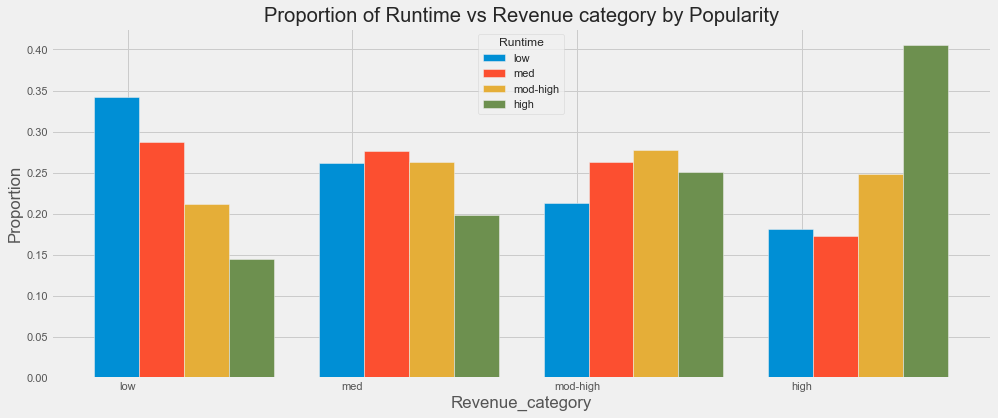

In [49]:
# Set plot style
plt.style.use('fivethirtyeight')

# set location and labels
ind = np.arange(len(time_prop['low_prop']))
width=0.2
locations=ind+width/4

# Set figure size
plt.subplots(figsize=(15, 6))

#Plot the proportion results
low_bars = plt.bar(ind, time_prop['low_prop'], width, label='low')
med_bars = plt.bar(ind+width, time_prop['med_prop'], width, label='med')
mhigh_bars = plt.bar(ind+width*2, time_prop['mod_high_prop'], width, label='mod-high')
high_bars = plt.bar(ind+width*3, time_prop['high_prop'], width, label='high')

# Set plot properties
plt.xlabel('Revenue_category')
plt.ylabel('Proportion')
plt.title('Proportion of Runtime vs Revenue category by Popularity')
plt.xticks(locations,labels)
plt.legend(title = 'Runtime', loc = 'best');

> -  Runtime has meagre association with popularity and revenue

**Function to split pipe character from features and explodes feature in dataframe**

In [50]:
def split_pipe(feature):
    # Copy original dataframe
    tmdb = tmdb_movies.copy()
    
    # Use split function to remove pipe character from features and add split values to feature column in data frame
    tmdb[feature] = tmdb[feature].str.split('|')
    
    # Explode function to merge each splitted feature element with entire dataframe  
    tmdb = tmdb.explode(feature)
    return tmdb

<a id='genre'></a>
### Research Question 5: How does most popular genre affects successful movies?

In [51]:
# call split function to get datframe with movie genres
movie_genre = split_pipe('genres')

# Groupby popularity and genre, find revenue mean
gen_rev = movie_genre.groupby(['popularity_category','genres']).agg(revenue_mean=('revenue','mean')).reset_index()
gen_rev.head()

,popularity_category,genres,revenue_mean
0,low,Action,3.770090e+07
1,low,Adventure,4.665459e+07
2,low,Animation,2.590416e+07
3,low,Comedy,2.476840e+07
4,low,Crime,3.039169e+07


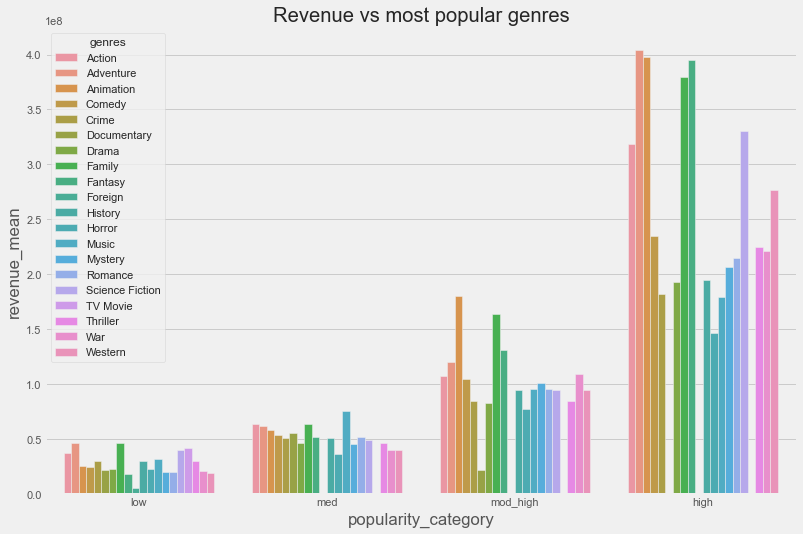

In [52]:
# Plot the results
plt.subplots(figsize=(12, 8))
sns.barplot(x = 'popularity_category', y = 'revenue_mean', hue ='genres',data = gen_rev)
plt.title('Revenue vs most popular genres');

> - Most popular genre movies are having highest revenue means and popularity

<a id='direct'></a>
### Research Question 6: Top 20 popular Director movies have higher revenue?

In [53]:
# call split func to get datframe with movie directors
movie_dir = split_pipe('director')

# Groupby popularity and genre, find revenue mean
dir_rev = movie_dir.groupby(['popularity_category', 'director']).agg(revenue_mean=('revenue','mean')).reset_index()

# Sort the director dataframe to select top 20
dir_rev = dir_rev.sort_values('revenue_mean', ascending = False).head(20)
dir_rev.head()

,popularity_category,director,revenue_mean
5541,high,Colin Trevorrow,1.513529e+09
6163,high,Joss Whedon,1.462297e+09
5492,high,Chris Buck,1.274219e+09
6003,high,Jennifer Lee,1.274219e+09
6766,high,Shane Black,1.215440e+09


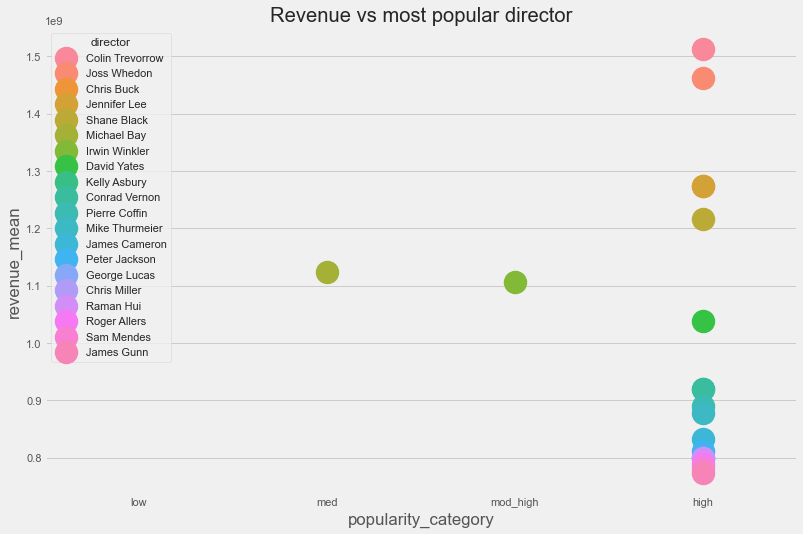

In [54]:
# Plot the results
plt.subplots(figsize=(12, 8))
sns.pointplot(x='popularity_category',y='revenue_mean',hue='director',data=dir_rev)
plt.title('Revenue vs most popular director');

> - Most popular director movies are having higher movie revenues

<a id='prod_comp'></a>
### Research Question 7: Top 20 popular production company movies have higher profit?

In [55]:
# call split func to get datframe with movie directors
movie_prod = split_pipe('production_companies')

# Groupby popularity and production_companies, find revenue mean
prod_rev = movie_prod.groupby(['popularity_category', 'production_companies']).agg(profit_sum=('profit','sum')).reset_index()

# Sort the production_companies dataframe to select top 20
prod_rev = prod_rev.sort_values('profit_sum', ascending = False).head(20)
prod_rev.head()

,popularity_category,production_companies,profit_sum
12927,high,Warner Bros.,2.569957e+10
12832,high,Universal Pictures,2.031588e+10
12919,high,Walt Disney Pictures,1.934644e+10
12786,high,Twentieth Century Fox Film Corporation,1.931985e+10
11972,high,Paramount Pictures,1.608946e+10


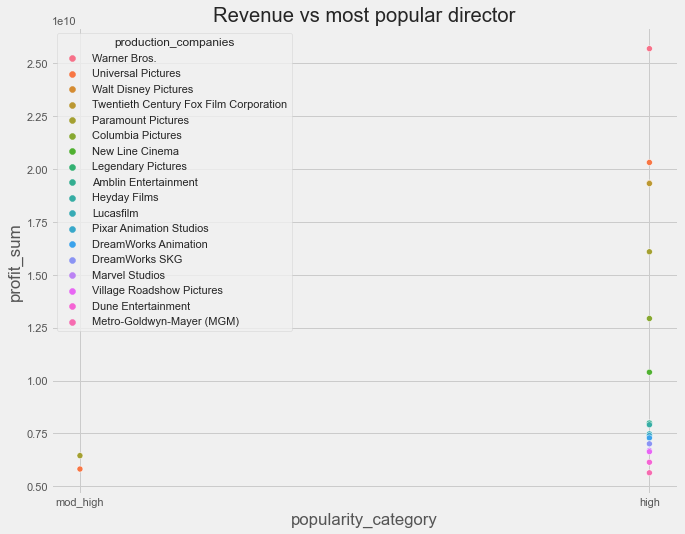

In [56]:
# Set plot style
#plt.style.use('seaborn-pastel')

# Plot the results
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='popularity_category',y='profit_sum',hue='production_companies',data=prod_rev)
plt.title('Revenue vs most popular director');

> - Most popular production companies are having huge profits

<a id='over_years'></a>
### Research Question 8:  Does popularity and revenue increased over years?

In [57]:
#Groupby year and calculate mean and median revenue
rev_mean = tmdb_movies.groupby('release_year').mean()['revenue']
print('Mean: \n', rev_mean.head(2))

rev_median = tmdb_movies.groupby('release_year').median()['revenue']
print('Median: \n', rev_median.head(2))

# Locate revenue index
rev_mean_ind = rev_mean.index
rev_median_ind = rev_median.index

Mean: 
 release_year
1960    25801000.0
1961    33772018.8
Name: revenue, dtype: float64
Median: 
 release_year
1960    25000000.0
1961     9750000.0
Name: revenue, dtype: float64


In [58]:
# Groupby year and calculate mean and median popularity
pop_mean = tmdb_movies.groupby('release_year').mean()['popularity']
print('Mean: \n', pop_mean.head(2))

pop_median = tmdb_movies.groupby('release_year').median()['popularity']
print('Median:\n', pop_median.head(2))

# Locate popularity index
pop_mean_ind = pop_mean.index
pop_median_ind = pop_median.index

Mean: 
 release_year
1960    1.324513
1961    0.787718
Name: popularity, dtype: float64
Median:
 release_year
1960    1.136943
1961    0.421073
Name: popularity, dtype: float64


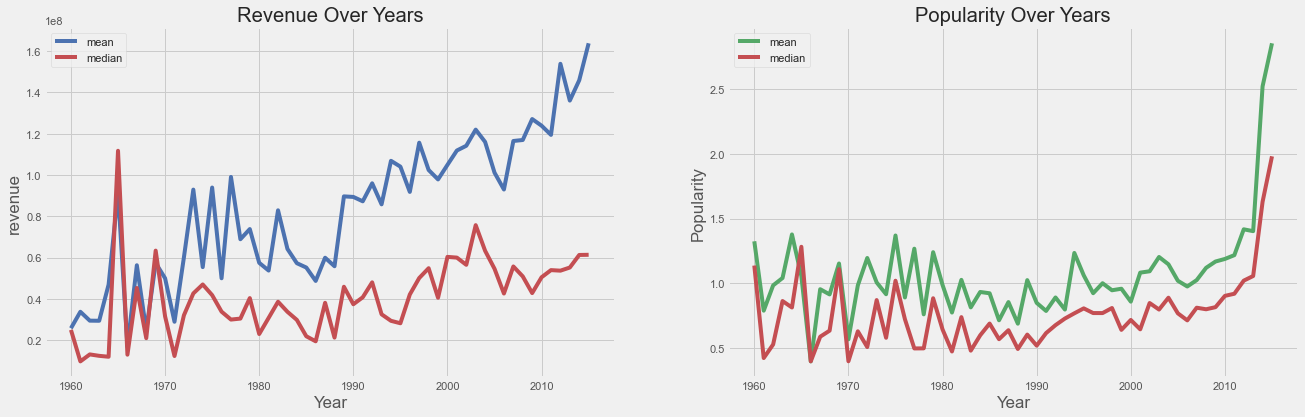

In [59]:
# Set figure size
plt.figure(figsize=(20,6))

# Plot mean and median revenue
plt.subplot(1,2,1)
plt.plot(rev_mean_ind, rev_mean, color = 'b', label = 'mean')
plt.plot(rev_median_ind, rev_median, color = 'r', label = 'median')

#set title and labels
plt.title('Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('revenue');
#set legend
plt.legend(loc='upper left');

# Plot mean and median popularity
plt.subplot(1,2,2)
plt.plot(pop_mean_ind, pop_mean, color = 'g', label = 'mean')
plt.plot(pop_median_ind, pop_median, color = 'r', label = 'median')

#set title and labels
plt.title('Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Popularity');
#set legend
plt.legend(loc='upper left');

> - Popularity and Revenue of movies are increased over years. Earlier stages are having ups and downs but, recent years are having increased popularity and revenue.

<a id='conclusions'></a>
## Conclusions
- According to my analysis, based on the correlation between movie features popularity and revenue have the high positive relationship. Mostly Highest revenue movies are having highest popularity. Both revenue and popularity has amicable relationship with profit as well. 
- So, Revenue, popularity are most important key features of success movies. Other movie features are analyzed based on revenue and popularity in this analysis.
- Vote average not completely associated with revenue and popularity as low vote_average movies are having high revenue by popularity and vice versa. high revenue movies don't have the significant high vote average. This might be due to vote average is biased with vote count
- Budget have modest association with popularity and revenue. Low budget movies are having higher revenue and popularity compared to high budget movies. So, budget isn't one of the major feature of success movie.
- Runtime also has meagre relationship with popularity and revenue. Absolutely, runtime isn't completely associated, both low and high runtime movies are having high revenue and popularity.
- Genere is one of the most important key features of successful movie which has harmony with popularity and revenue. The most popular genre are *Action* and *Adventure*. 
- The top 20 most popular directors are having highest revenues which means director also one of the key feature associated with success movie. The top most popular director was *Colin Trevorrow*
- Most popular production companies are having huge profits. The most popular production company was *Warner Bros.* 
- Popularity and Revenue of movies are increased over years. In, Earlier stages are both popularity and revenue are had ups and downs. But, in recent times, especially after *2010* they are having increased popularity and revenue.

> - To summarize, Popularity, Revenue, Genre, Director and Production companies are the of most important key features of successful movie.

> **Note**: 
> - These finding are **tentative** as it follows typical data analysis process and doesn't used any inferential statistics or machine learning techniques
> - There were limitations like high number of missing and inappropriate data. To optimize the dataset null and zero values are dropped. Some movie features doen't have specific upperbounds which may have outliers. Also, unused columns were dropped.
> - The analysis does not state or imply that one change causes another, correlation does not imply causation.

**References :**
<ul>
    <li><a>https://www.kaggle.com/tmdb/tmdb-movie-metadata</a></li>
    <li><a>https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv</a></li>
    <li><a>https://medium.com/</a></li>
    <li><a>https://stackoverflow.com</a></li>
    <li><a>https://github.com</a></li>
    <li><a>https://pandas.pydata.org</a></li>
    <li><a>https://seaborn.pydata.org</a></li>
</ul>